#*Sentiment Analysis of Twitter*

*Created by Syed Ali Hamza Shah,
ID: 22102368*

#Introduction
Showing the Nuances of Offensive Language in Tweets.
Project aims to delve into the diverse expressions of sentiment, shedding light on the complexities and variations within offensive language on social media platforms.

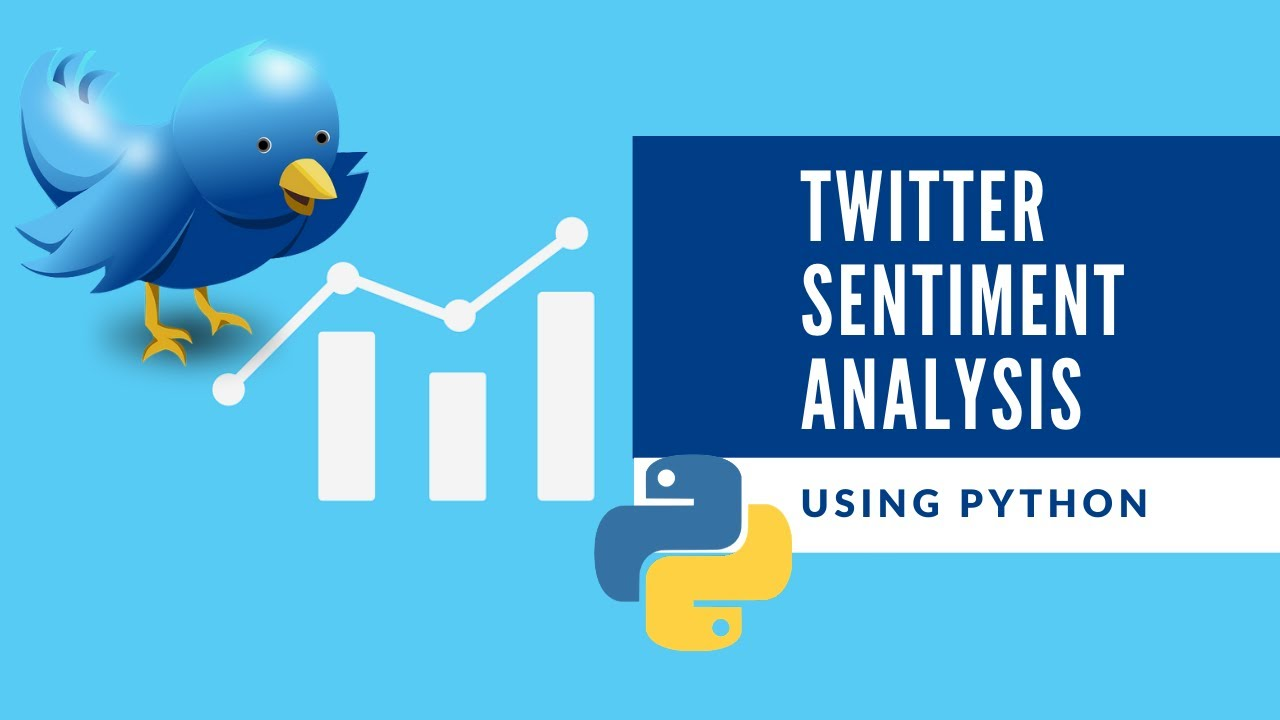

#**Libraries Needed**
This section of the code is focused on importing and setting up the necessary libraries for a Natural Language Processing (NLP).

It establishes the foundation for text processing, machine learning, and evaluation in this NLP project.

In [1]:
# Import standard libraries
import os  # Operating System
import re  # Regular Expressions

# Data manipulation and analysis libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP) libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Machine Learning (ML) and evaluation libraries
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Set a random seed for reproducibility
RANDOM_SEED = 100


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#**Data Loading**

This code mounts Google Drive in a Google Colab notebook, allowing easy access to files and resources stored on Google Drive within the notebook environment.

In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_folder = '/content/drive/MyDrive/Python/Dataset fot 1st task'

In [4]:
# load training data
train = pd.read_csv(os.path.join(data_folder, '/content/drive/MyDrive/Python/Dataset fot 1st task/augmented_data.csv'))
test = pd.read_csv('/content/drive/MyDrive/Python/Dataset fot 1st task/test.csv')


#**Exploratory Data Analysis (EDA)**



##**Dataset Overview:**

The dataset contains information on the number of entries, giving an overview of its size.

In [6]:
print(f'Number of entries: {len(train)}') # summarise the details

Number of entries: 39720


Displaying the first few rows allows a glimpse into the actual data.

In [7]:
print(train.shape)
train.head()

(39720, 3)


,id,tweet,label
0,86426,@USER She should ask a few native Americans wh...,UNT
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN
2,16820,Amazon is investigating Chinese employees who ...,NOT
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT


In [8]:
print(test.shape)
test.head()

(460, 2)


,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


##**Class Distribution Visualization:**

A visual representation of class distribution using a count plot.

<Axes: xlabel='label', ylabel='count'>

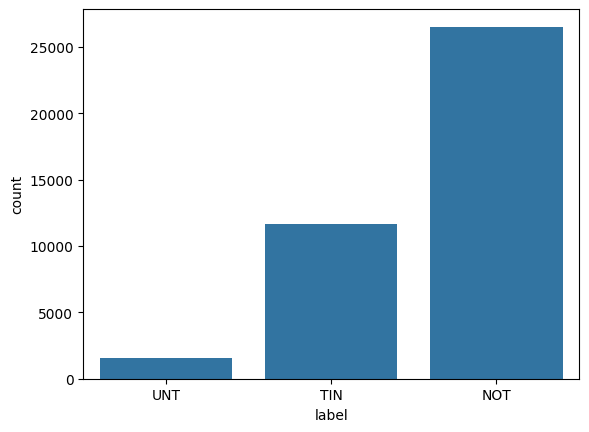

In [9]:
sns.countplot(x=train['label'])

##**Missing Values Check:**

Identifying any missing values in the dataset.

In [10]:
train.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

##**Total Number of Entities:**

Reiterating the total count of entities in the dataset.

In [11]:
print("total number of entities are :", len(train))

total number of entities are : 39720


#**Data Preprocessing**

This section prepares the text data, including cleaning, tokenization, and vectorization.

##**Tokenization and Lemmatization:**

Utilizes TweetTokenizer and WordNetLemmatizer to tokenize and lemmatize text.

In [13]:
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
lemmatizer = WordNetLemmatizer()

##**Cleaning Text:**

Defines a function clean_text for text preprocessing, including lowercase conversion, removing extra spaces, stopwords, and special characters.

In [15]:
# Get the English stopwords
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces

    tokens = tokenizer.tokenize(text) # Tokenize the text
    tokens = [token for token in tokens if token not in stop_words] # Remove stopwords
    lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])# Lemmatize the tokens

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', lemmatized_text)
    return text
# Test the clean_text function with a statement
sample_text = "This is a random statement with symbols & numbers: 123#@!$%"
cleaned_text = clean_text(sample_text)
print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_text)


Original Text: This is a random statement with symbols & numbers: 123#@!$%
Cleaned Text: random statement symbol  number       


##**Adding Cleaned Text Column:**

Adds a new column 'Clean_tweet' to the dataframe by applying the clean_text function to the 'tweet' column.

In [13]:
# add new column to data frame
train['Clean_tweet'] = train['tweet'].apply(clean_text)
train

,id,tweet,label,Clean_tweet
0,86426,@USER She should ask a few native Americans wh...,UNT,ask native american take
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,TIN,go home drunk maga trump url
2,16820,Amazon is investigating Chinese employees who ...,NOT,amazon investigating chinese employee selling ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",UNT,someone shouldvetaken piece shit volcano
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberal illegals move red state
...,...,...,...,...
39715,95338,@USER Sometimes I get strong vibes from people...,TIN,sometimes get strong vibe people man vibe ten...
39716,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,benidorm creamfields maga shabby summer
39717,82921,@USER And why report this garbage. We don't g...,TIN,report garbage give crap
39718,27429,@USER Pussy,UNT,pussy


In [14]:
# add new column to data frame
test['Clean_tweet'] = test['tweet'].apply(clean_text)
test

,id,tweet,Clean_tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,whoisq wherestheserver dumpnike declasfisa dem...
1,27014,"#ConstitutionDay is revered by Conservatives, ...",constitutionday revered conservative hated pr...
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,foxnews nra maga potus trump ndamendment rnc u...
3,13876,#Watching #Boomer getting the news that she is...,watching boomer getting news still parole alwa...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,nopasaran unity demo oppose farright london ...
...,...,...,...
455,22569,"#Antifa are mentally unstable cowards, pretend...",antifa mentally unstable coward pretending re...
456,48938,@USER @USER And Browning looked like dog shit ...,browning looked like dog shit fcs school point
457,41438,All two of them taste like ass. URL,two taste like as url
458,73439,#DespicableDems lie again about rifles. Dem Di...,despicabledems lie rifle dem distorted law pu...


#**Model Preparation**

This section prepares the text data for modeling. It introduces functions for model training, evaluation, and visualization of results.

'X' represents the input features, and 'y' represents the corresponding labels (target variable).

In [15]:
X = train['Clean_tweet']
y = train['label']


##**Data Splitting:**

Splits the dataset into training and validation sets. 70% is train size and 30% validation size.

In [16]:
X_train_text, X_val_text, y_train, y_val = train_test_split(train['Clean_tweet'], train['label'], test_size=0.3, random_state=200)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')


training data set size: 27804
validation data set size: 11916


##**Model Training and Evaluation Function:**

Defines a function train_and_evaluate_model to train and evaluate a given model.

In [17]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_val)}")

    print("Classification Report:")
    print(classification_report(y_val, y_pred_val))

    return model


##**Text Vectorization - TF-IDF:**

Utilizes TF-IDF Vectorizer to convert text data into numerical vectors.


###**Standardization of TF-IDF Data:**

Standardizes the TF-IDF data using StandardScaler.

In [18]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_val_tfidf = tfidf_vectorizer.transform(X_val_text)

# Standardize the TF-IDF data
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_val_scaled = scaler.transform(X_val_tfidf)

##**Confusion Matrix Plotting:**

Defines a function plot_confusion_matrix to create and display a confusion matrix.

In [19]:
# Function to create and display a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
classes = ['Not Offensive', 'Targeted Insult', 'Untargeted']

#**Model Training and Evaluation**


1. **Support Vector Machine (SVM):**

2. **Logistic Regression:**

3. **Random Forest:**

4. **Decision Tree:**

5. **Naive Bayes:**

6. **Ensemble Model (VotingClassifier):**

These models are employed for sentiment analysis on Twitter text data, aiming to classify the text into different offensive language categories.

##**Support Vector Machine (SVM)**

Trains and evaluates a Support Vector Machine (SVM) model on the preprocessed data.

SVM
Training Accuracy: 0.954718745504244
Validation Accuracy: 0.9173380328969453
Classification Report:
              precision    recall  f1-score   support

         NOT       0.91      0.99      0.95      7875
         TIN       0.94      0.81      0.87      3553
         UNT       0.98      0.50      0.66       488

    accuracy                           0.92     11916
   macro avg       0.94      0.77      0.83     11916
weighted avg       0.92      0.92      0.91     11916



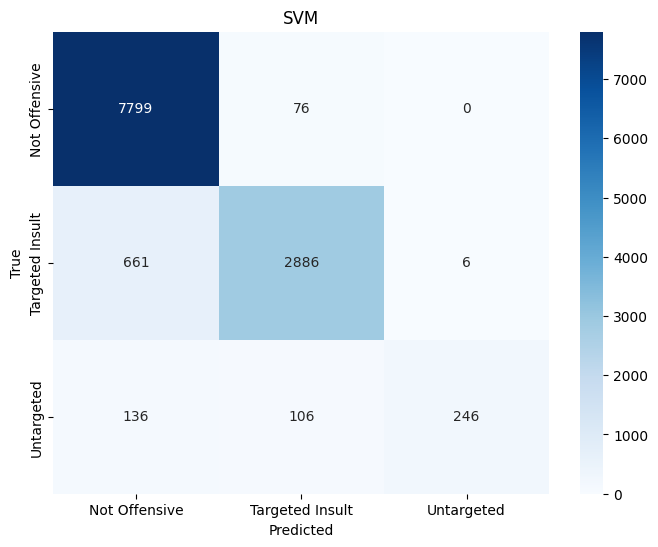

In [20]:
# SVM
print("SVM")
svm_model = SVC(random_state=100)
train_and_evaluate_model(svm_model, X_train_scaled, y_train, X_val_scaled, y_val)
#Plot Confusion Matrix
plot_confusion_matrix(y_val, svm_model.predict(X_val_scaled), classes, 'SVM')

##**Logistic Regression:**

Trains and evaluates a Logistic Regression model on the preprocessed data with displaying Confusion Matrix.

Logistic Regression
Training Accuracy: 0.9946770248885053
Validation Accuracy: 0.9575360859348775
Classification Report:
              precision    recall  f1-score   support

         NOT       0.97      0.97      0.97      7875
         TIN       0.93      0.95      0.94      3553
         UNT       0.93      0.83      0.88       488

    accuracy                           0.96     11916
   macro avg       0.94      0.91      0.93     11916
weighted avg       0.96      0.96      0.96     11916



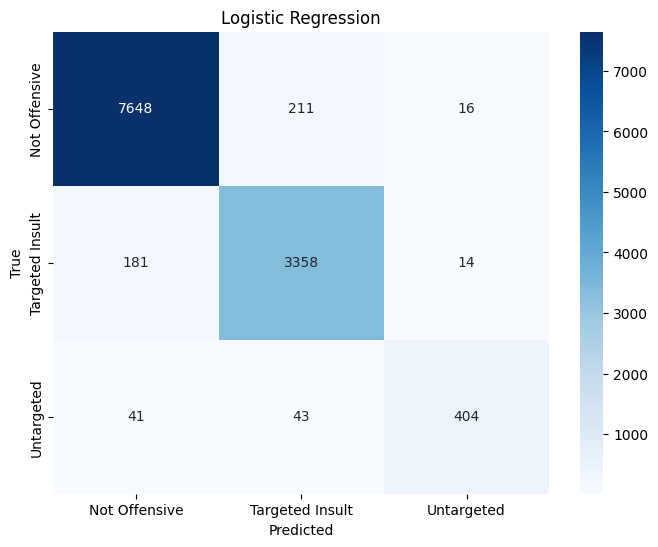

In [21]:
# Logistic Regression
print("Logistic Regression")
logistic_regression_model = LogisticRegression(max_iter=10000, random_state=90)
train_and_evaluate_model(logistic_regression_model, X_train_scaled, y_train, X_val_scaled, y_val)

#Plot Confusion Matrix
plot_confusion_matrix(y_val, logistic_regression_model.predict(X_val_scaled), classes, 'Logistic Regression')

##**Random Forest**

Trains and evaluates a Random Forest model on the preprocessed data and showing Confusion Matrix.

Random Forest
Training Accuracy: 0.9966551575312904
Validation Accuracy: 0.9707955689828801
Classification Report:
              precision    recall  f1-score   support

         NOT       0.97      0.99      0.98      7875
         TIN       0.97      0.94      0.96      3553
         UNT       0.96      0.84      0.90       488

    accuracy                           0.97     11916
   macro avg       0.97      0.93      0.95     11916
weighted avg       0.97      0.97      0.97     11916



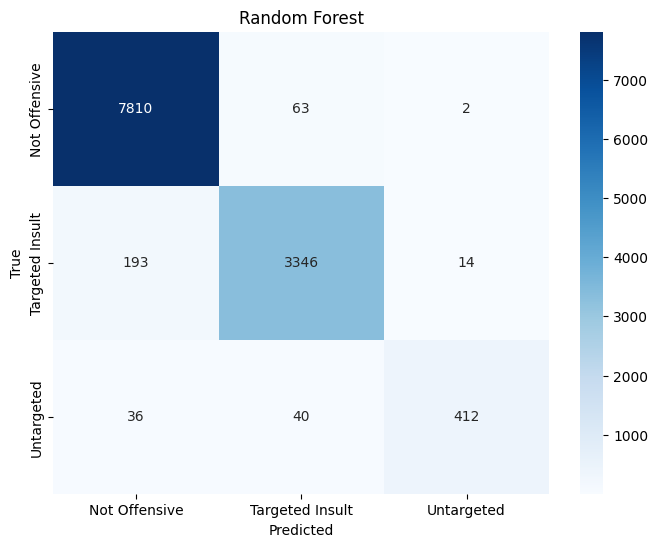

In [22]:
# Random Forest
print("Random Forest")
random_forest_model = RandomForestClassifier(random_state=100)
train_and_evaluate_model(random_forest_model, X_train_scaled, y_train, X_val_scaled, y_val)

#Plot Confusion Matrix
plot_confusion_matrix(y_val, random_forest_model.predict(X_val_scaled), classes, 'Random Forest')

##**Decision Tree**

Trains and evaluates a Decision Tree model on the preprocessed data and showing Confusion Matrix.

Decision Tree
Training Accuracy: 0.9966551575312904
Validation Accuracy: 0.9634944612286002
Classification Report:
              precision    recall  f1-score   support

         NOT       0.97      0.98      0.98      7875
         TIN       0.94      0.95      0.94      3553
         UNT       0.95      0.84      0.89       488

    accuracy                           0.96     11916
   macro avg       0.95      0.92      0.94     11916
weighted avg       0.96      0.96      0.96     11916



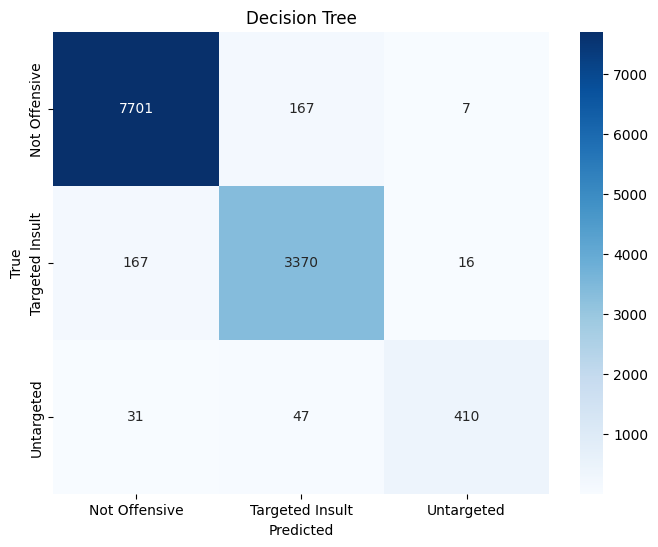

In [24]:
# Decision Tree
print("Decision Tree")
decision_tree_model = DecisionTreeClassifier(random_state=100)
train_and_evaluate_model(decision_tree_model, X_train_scaled, y_train, X_val_scaled, y_val)

#Plot Confusion Matrix
plot_confusion_matrix(y_val, decision_tree_model.predict(X_val_scaled), classes, 'Decision Tree')

##**Naive Bayes**

Trains and evaluates a Naive Bayes model on the preprocessed data and showing Confusion Matrix.

Naive Bayes
Training Accuracy: 0.8674651129333909
Validation Accuracy: 0.8137797918764687
Classification Report:
              precision    recall  f1-score   support

         NOT       0.95      0.79      0.86      7875
         TIN       0.72      0.86      0.78      3553
         UNT       0.37      0.87      0.52       488

    accuracy                           0.81     11916
   macro avg       0.68      0.84      0.72     11916
weighted avg       0.86      0.81      0.83     11916



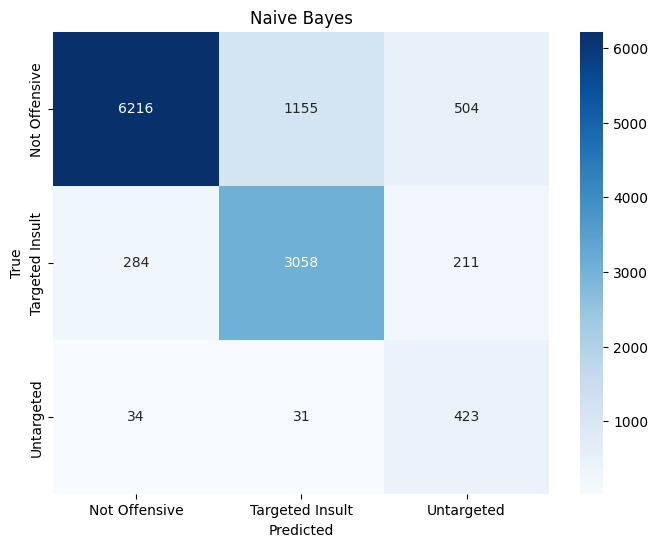

In [25]:
# Naive Bayes
print("Naive Bayes")
naive_bayes_model = MultinomialNB()
train_and_evaluate_model(naive_bayes_model, X_train_scaled, y_train, X_val_scaled, y_val)

#Plot Confusion Matrix
plot_confusion_matrix(y_val, naive_bayes_model.predict(X_val_scaled), classes, 'Naive Bayes')

##**Ensemble Model (VotingClassifier)**

Trains and evaluates a Ensemble Model (VotingClassifier) model on the preprocessed data and showing Confusion Matrix.

Ensemble Model (VotingClassifier)
Training Accuracy: 0.9960437347144295
Validation Accuracy: 0.9671869754951326
Classification Report:
              precision    recall  f1-score   support

         NOT       0.97      0.99      0.98      7875
         TIN       0.96      0.94      0.95      3553
         UNT       0.97      0.83      0.90       488

    accuracy                           0.97     11916
   macro avg       0.97      0.92      0.94     11916
weighted avg       0.97      0.97      0.97     11916



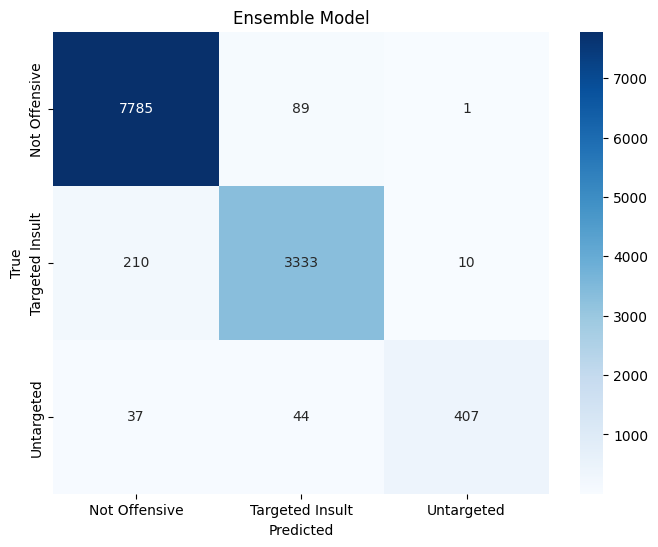

In [26]:
# Ensemble Model (VotingClassifier)
print("Ensemble Model (VotingClassifier)")
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic', logistic_regression_model),
        ('random_forest', random_forest_model),
        ('decision_tree', decision_tree_model),
        ('naive_bayes', naive_bayes_model),
        ('svm', svm_model)
    ],
    voting='hard'
)
train_and_evaluate_model(ensemble_model, X_train_scaled, y_train, X_val_scaled, y_val)

#Plot Confusion Matrix
plot_confusion_matrix(y_val, ensemble_model.predict(X_val_scaled), classes, 'Ensemble Model')

# Conclusion

The top-performing machine learning model is the Random Forest, boasting the highest accuracy among all the different models considered.

With the latest insights, the table has been updated as follows:

|Model | Preprocessing  | Training Accuracy| Validation Accuracy |  
|------|---------------|------------| ------------|
|Support Vector Machine (SVM)    | Tokenization and Lemmatization   | 0.9547 | 0.9173 |
|Logistic Regression    | Tokenization and Lemmatization | 0.9946 | 0.9575 |
|**Random Forest**    | Tokenization and Lemmatization  | **0.9966** | **0.9707** |
|Decision tree    | Tokenization and Lemmatization |  0.9966 | 0.9634 |
|Naive Bayes    | Tokenization and Lemmatization |  0.8674 | 0.8137 |
| Ensemble Model (VotingClassifier) | Tokenization and Lemmatization | 0.9960 | 0.9671 |

It is evident that Random Forest, leveraging in Training accuracy and Validation Accuracy, stands out with the highest accuracy among the models considered.


#**Making Predictions on Test Data**
Predictions using the Random Forest model.

In [27]:
x_test = test['Clean_tweet'] # Assuming x_test is a series containing the cleaned text of your test data
# Vectorize the test data using the same vectorizer used for training
x_test_tfidf = tfidf_vectorizer.transform(x_test)
x_test_scaled = scaler.transform(x_test_tfidf)
rf_predictions = random_forest_model.predict(x_test_scaled) # Making predictions using the Random Forest model
print(rf_predictions) # Assuming 'rf_predictions' is the final result


['NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'TIN' 'TIN' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'UNT' 'TIN'
 'TIN' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT'
 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT'
 'NOT' 'TIN' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'TIN' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT'
 'NOT' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'NOT' 'TIN' 'TIN' 'TIN'
 'TIN' 'NOT' 'NOT' 'TIN' 'NOT' 'NOT' 'NOT' 'NOT' 'N

Convert the prediction result into test-predictions CSV file.

In [28]:
result_df_RF = pd.DataFrame({'id': test['id'], 'prediction': rf_predictions}) # Create a DataFrame with 'id' and 'prediction' columns
# Print the resulting DataFrame
print(result_df_RF)

result_df_RF.to_csv('test-predictions-RF.csv', index=False)

        id prediction
0    15923        NOT
1    27014        NOT
2    30530        NOT
3    13876        NOT
4    60133        NOT
..     ...        ...
455  22569        TIN
456  48938        TIN
457  41438        TIN
458  73439        NOT
459  67018        TIN

[460 rows x 2 columns]


Used 'Professor Hansi' [code](https://github.com/HHansi/Applied-AI-CodaLab/blob/master/image-processing/format_submission.py) to convert the CSV file to JSON file.

In [30]:
# Created by Hansi at 12/16/2022
import json

import pandas as pd

test_file_path = "/content/test-predictions-RF.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))


[{'id': 15923, 'prediction': 'NOT'}, {'id': 27014, 'prediction': 'NOT'}, {'id': 30530, 'prediction': 'NOT'}, {'id': 13876, 'prediction': 'NOT'}, {'id': 60133, 'prediction': 'NOT'}]
